In [30]:
install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:
BiocManager::install(c("clusterProfiler", "org.Hs.eg.db", "enrichplot", "DOSE"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'clusterProfiler' 'org.Hs.eg.db' 'enrichplot'
  'DOSE'”
Old packages: 'purrr', 'sessioninfo'



In [55]:
library(clusterProfiler)
library(org.Hs.eg.db)  # Human gene annotation
library(enrichplot)
library(ggplot2)

In [56]:
install.packages("ggridges")
library(ggridges)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [42]:
deg <- read.delim("GSE132215.top.table.tsv", header = TRUE, sep = "\t")

str(deg)

'data.frame':	10556 obs. of  9 variables:
 $ GeneID        : int  718 7128 5266 629 3460 6303 4643 6703 7764 4791 ...
 $ padj          : num  0.0001 0.000218 0.000945 0.001252 0.001256 ...
 $ pvalue        : num  7.54e-09 3.28e-08 2.13e-07 3.77e-07 4.73e-07 6.75e-07 1.06e-06 6.65e-06 6.33e-06 7.45e-06 ...
 $ lfcSE         : num  0.3206 0.2221 0.3136 0.3127 0.0899 ...
 $ stat          : num  5.78 5.53 5.19 5.08 5.04 ...
 $ log2FoldChange: num  1.852 1.227 1.627 1.589 0.453 ...
 $ baseMean      : num  1931 194 334 195 481 ...
 $ Symbol        : chr  "C3" "TNFAIP3" "PI3" "CFB" ...
 $ Description   : chr  "complement C3" "TNF alpha induced protein 3" "peptidase inhibitor 3" "complement factor B" ...


In [43]:
# Remove NAs and Order by log2FoldChange
deg <- na.omit(deg)
deg <- deg[order(deg$log2FoldChange, decreasing = TRUE), ]

In [44]:
# Convert Gene Symbols to Entrez IDs
deg$ENTREZID <- mapIds(org.Hs.eg.db,
                        keys = deg$Symbol,
                        column = "ENTREZID",
                        keytype = "SYMBOL",
                        multiVals = "first")

# Remove NA values
deg <- na.omit(deg)

'select()' returned 1:many mapping between keys and columns



In [45]:
# Named vector: Entrez ID as names, log2FoldChange as values
ranked_genes <- deg$log2FoldChange
names(ranked_genes) <- deg$ENTREZID
ranked_genes <- sort(ranked_genes, decreasing = TRUE)
head(ranked_genes)

6347     3576     6703     5743     7980    22795 
3.335739 3.331978 2.931951 2.787177 2.448515 2.360908

In [46]:
summary(ranked_genes)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.536932 -0.159135 -0.013288  0.009544  0.150542  3.335739 

In [40]:
gsea_results <- gseKEGG(geneList = ranked_genes,
                         organism = "hsa",
                         minGSSize = 10,
                         maxGSSize = 500,
                         pvalueCutoff = 0.05,
                         scoreType = "pos",  # Fix for only positive values
                         verbose = FALSE)

no term enriched under specific pvalueCutoff...



In [47]:
gsea_results <- gseKEGG(geneList = ranked_genes,
                         organism = "hsa",  # Homo sapiens
                         minGSSize = 10,
                         maxGSSize = 500,
                         pvalueCutoff = 0.05,
                         verbose = FALSE)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.06% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”


In [48]:
head(gsea_results)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
hsa04060,hsa04060,Cytokine-cytokine receptor interaction,75,0.6905326,2.442755,1.000000e-10,3.310000e-08,2.157895e-08,1342,"tags=51%, list=13%, signal=44%",6347/3576/7850/2919/6367/6372/3976/58191/9966/56477/3624/3566/652/8808/8797/3554/3459/1435/3460/3601/93/4055/53832/9180/3575/656/3579/8795/8741/654/27242/3557/3603/10220/84957/132014/163702/7046
hsa05163,hsa05163,Human cytomegalovirus infection,131,0.5559320,2.147440,2.224820e-08,3.682078e-06,2.400464e-06,2219,"tags=44%, list=21%, signal=35%",6347/3576/5743/5732/4609/340061/6892/810/4792/3133/3106/5829/2185/3107/3134/3554/5970/64764/7157/7186/2783/3579/9564/3105/1978/2786/3685/115/109/1956/51806/6890/3709/5595/567/578/3710/8772/1388/55970/3551/7132/5532/5604/595/2785/3553/7249/7422/6891/2775/2768/1021/5530/5879/2782/3716
hsa05140,hsa05140,Leishmaniasis,37,0.7465320,2.297886,9.960302e-08,8.954492e-06,5.837719e-06,667,"tags=43%, list=6%, signal=41%",5743/718/7097/3725/3115/3123/65108/4792/2353/3109/3459/5970/3113/3108/3460/3122
hsa05168,hsa05168,Herpes simplex virus 1 infection,116,0.5645675,2.156799,1.082114e-07,8.954492e-06,5.837719e-06,1441,"tags=34%, list=14%, signal=29%",6347/718/7097/330/340061/972/3115/4939/3123/3678/6892/9641/5371/4792/3133/3106/3107/3134/3109/3459/5970/3113/3108/3460/3122/7157/4938/7186/4940/64135/1616/7187/3105/1978/6890/23586/567/578/8772
hsa04061,hsa04061,Viral protein interaction with cytokine and cytokine receptor,23,0.8063039,2.231348,4.623930e-07,2.900183e-05,1.890722e-05,977,"tags=52%, list=9%, signal=47%",6347/3576/2919/6367/6372/56477/8797/1435/4055/53832/3579/8795
hsa03010,hsa03010,Ribosome,98,-0.5190094,-2.108773,5.257129e-07,2.900183e-05,1.890722e-05,3441,"tags=70%, list=33%, signal=48%",51263/6210/51187/64983/9801/6136/10573/6188/64969/4736/6143/2197/51021/11222/64965/64960/6125/51318/6157/63931/6164/6147/6181/200916/51373/64979/6156/6206/6161/6224/6189/6128/28998/6176/6208/6167/6168/6152/219927/6165/6232/64963/6235/6230/6166/6160/6146/6201/11224/6222/6233/65008/54460/6150/55052/6218/6135/6154/6231/6129/6144/9349/9553/51023/6171/55173/51121/29093/51065


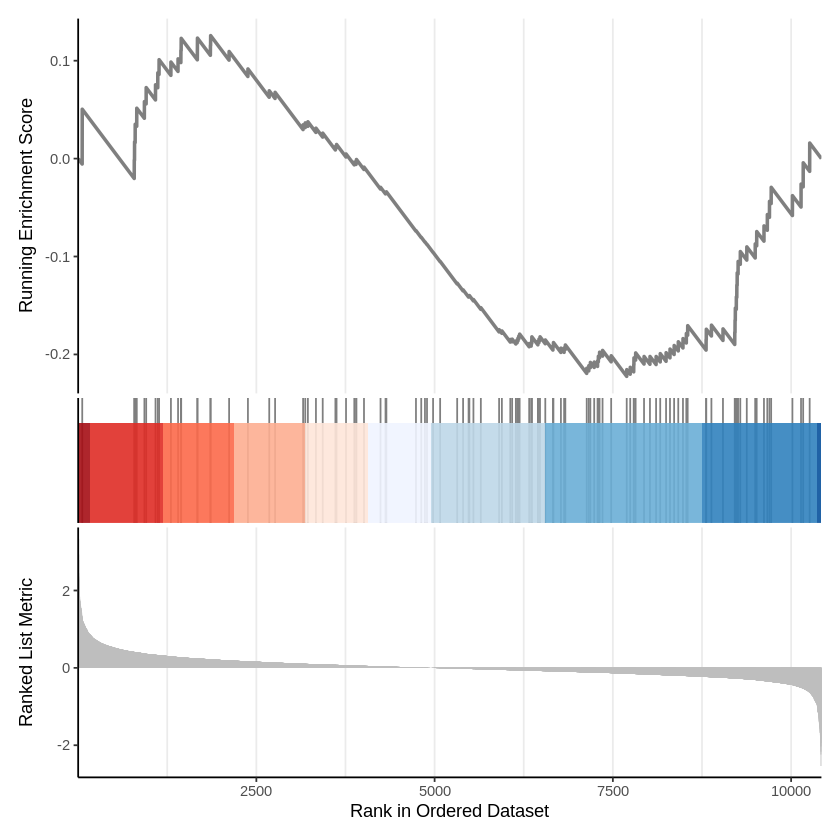

In [59]:
gseaplot2(gsea_results, geneSetID = "hsa04110")  # Replace with a significant pathway ID

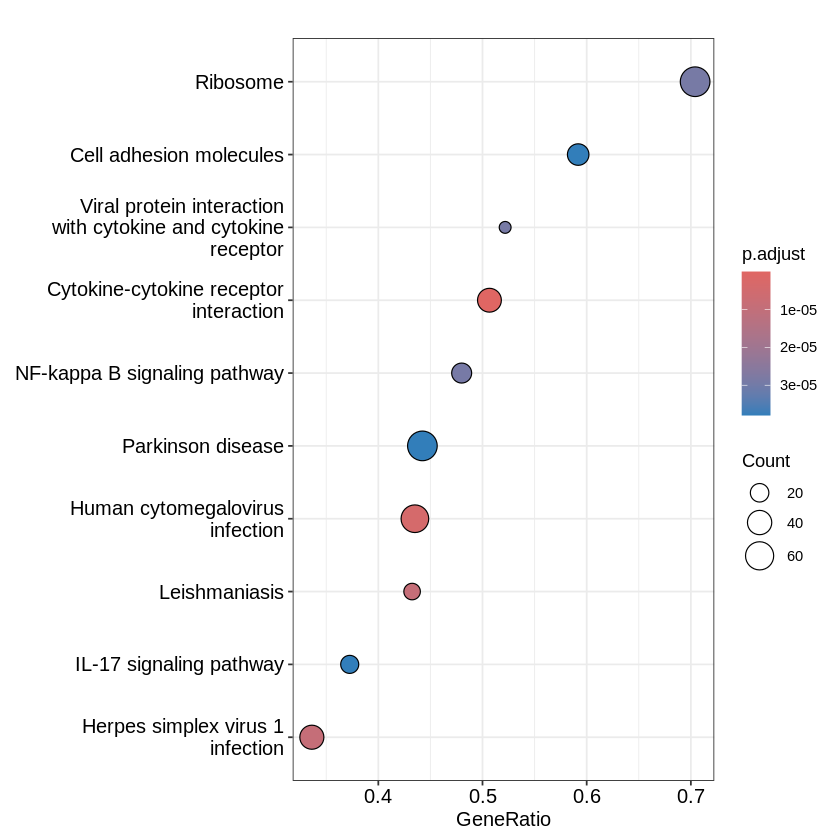

In [52]:
dotplot(gsea_results, showCategory = 10)  # Show top 10 enriched pathways

Picking joint bandwidth of 0.187



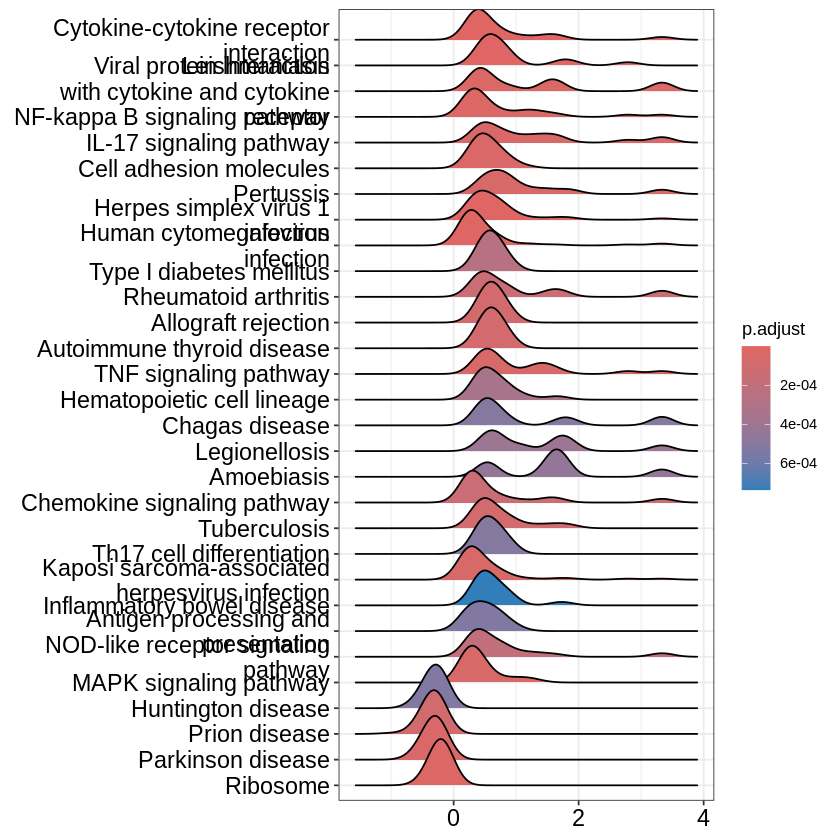

In [57]:
ridgeplot(gsea_results)

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


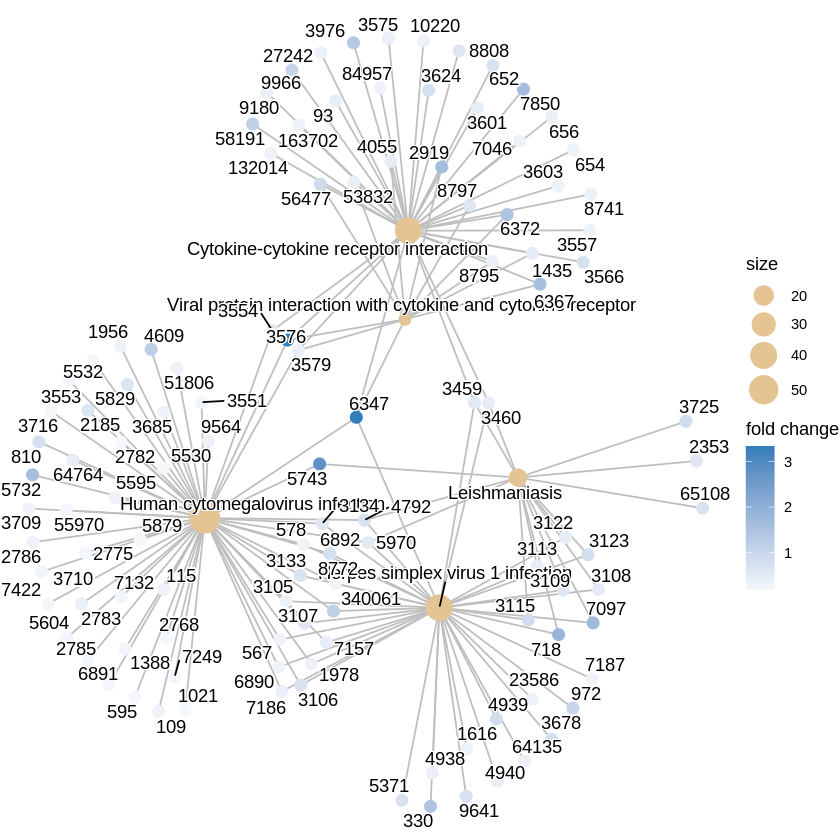

In [58]:
cnetplot(gsea_results, foldChange = ranked_genes)